## 1. 二叉树的最大深度

`简单`

给定一个二叉树 root ，返回其最大深度。

二叉树的 最大深度 是指从根节点到最远叶子节点的最长路径上的节点数。

 

示例 1：

> 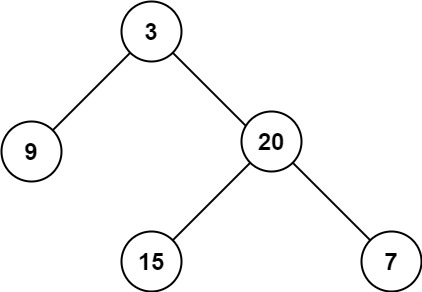
> 
> 输入：root = [3,9,20,null,null,15,7]
>
> 输出：3

示例 2：

> 输入：root = [1,null,2]
> 
> 输出：2

### 深度优先搜索

深度优先就是关注二叉树的深度，逮着一个节点算它的深度。

但这个节点也有自己的子节点，我们不知道要循环/遍历多少次，所以用递归就行了，告诉程序指导这个节点是空的，也就不需要往下找了。

具体的教程：[LeetCode--二叉树的最大深度](https://leetcode.cn/problems/maximum-depth-of-binary-tree/solutions/349250/er-cha-shu-de-zui-da-shen-du-by-leetcode-solution)

### 广度优先搜索

广度优先搜索就是按照层数遍历一大遍。

### 代码

二叉树的搜索问题，深度优先搜索和广度优先搜索。大二学的，现在全都忘了，应该是要用递归的，幸好前面的`快速幂算法`练过。

In [10]:
# 深度优先搜索
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        def mid(node):
            if not node: return 0
            leftdepth = mid(node.left)
            rightdepth = mid(node.right)
            return max(leftdepth, rightdepth) + 1
        return mid(root)

In [11]:
# 复习一下快速幂算法

class Solution:
    def myPow(self, x: float, n: int) -> float:
        def fastMul(N):
            if not N: return 1.0
            y = fastMul(N // 2)
            return y * y if N % 2 == 0 else y * y * x
        return fastMul(n) if n >= 0 else 1.0 / fastMul(-n)

In [12]:
# 广度优先搜索
# 作者：Krahets
# 链接：https://leetcode.cn/problems/maximum-depth-of-binary-tree/solutions/2361697/104-er-cha-shu-de-zui-da-shen-du-hou-xu-txzrx/
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root: return 0
        queue, res = [root], 0
        while queue:
            tmp = []
            for node in queue:
                if node.left: tmp.append(node.left)
                if node.right: tmp.append(node.right)
            queue = tmp
            res += 1
        return res

## 2. 二叉树的最小深度

`简单`

给定一个二叉树，找出其最小深度。

最小深度是从根节点到最近叶子节点的最短路径上的节点数量。

说明：叶子节点是指没有子节点的节点。

 

示例 1：

> 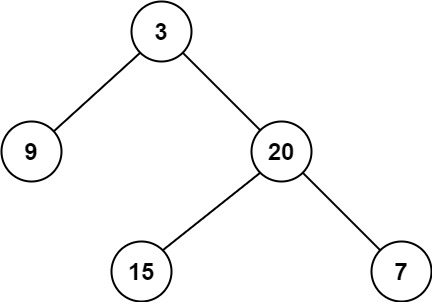
> 
> 输入：root = [3,9,20,null,null,15,7]
> 
> 输出：2

示例 2：

> 输入：root = [2,null,3,null,4,null,5,null,6]
> 
> 输出：5

### 代码

用的广度优先搜索，稍微改了改。感觉递归也可以。

In [13]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def minDepth(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        depth = 1
        queue = [root]

        while queue:
            tmp = []
            if not queue: return depth
            for node in queue:
                if not node.left and not node.right:
                    return depth
                else:
                    if node.left:
                        tmp.append(node.left)
                    if node.right:
                        tmp.append(node.right)
            depth += 1
            queue = tmp

想想深度优先的递归怎么做？

感觉就是把最大路径的 max 改成 min 再稍微改改，就行了。

In [14]:
# 作者：编程文青李狗蛋
# 链接：https://leetcode.cn/problems/minimum-depth-of-binary-tree/solutions/1339645/acm-xuan-shou-tu-jie-leetcode-by-rocky04-hbup/

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def minDepth(self, root: TreeNode) -> int:
        # 二叉树为空，最小高度为 0
        if root == None:
            return 0
        # 只有根节点，最小高度为 1
        if root.left == None and root.right == None:
            return 1
        # 左子树最小值和右子树最小值
        leftMindepth = self.minDepth(root.left)
        rightMindepth = self.minDepth(root.right)

        # 如果节点的左子树不为空，右子树为空
        if root.left != None and root.right == None:
            return leftMindepth + 1
        # 如果节点的右子树不为空，左子树为空
        if root.left == None and root.right != None:
            return rightMindepth + 1
        # 左右子树都不为空
        return min(leftMindepth, rightMindepth) + 1

## 3. 二叉树的中序遍历

给定一个二叉树的根节点 root ，返回 它的 中序 遍历 。

 

示例 1：

> 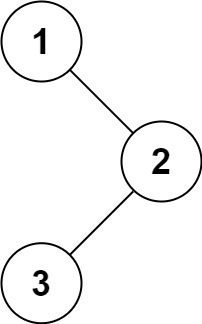
> 
> 输入：root = [1,null,2,3]
> 
> 输出：[1,3,2]

示例 2：

> 输入：root = []
> 
> 输出：[]

示例 3：

> 输入：root = [1]
> 
> 输出：[1]

### 代码

第一个没看思路直接动手写出来的递归，纪念一下。

递归还是要画图啊，不画图我这个新手写不出来。

In [17]:
from typing import List
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []
        res = list()
        def ldr(node):
            if node.left:
                left = ldr(node.left)
                
            res.append(node.val)
            
            if node.right:
                right = ldr(node.right)
        ldr(root)
        return res